In [3]:
import numpy as np
import scipy.io
from pathlib import Path
# from kilosort.io import load_ops

# Define Path and Load Files
results_dir = Path('D:\\20250602\\kilosort4')
APtimestamps = np.load(r"D:\20250602\zarya20250602dots3DMP_APtimestamps.npy")
save_path = 'D:\zarya_20250602_unit.mat'

spike_clusters = np.load(results_dir / 'spike_clusters.npy')
spike_times = np.load(results_dir / 'spike_times.npy')
channel_positions = np.load(results_dir / 'channel_positions.npy')
channel_map =  np.load(results_dir / 'channel_map.npy')
templates =  np.load(results_dir / 'templates.npy')

In [4]:
chan_best = (templates**2).sum(axis=1).argmax(axis=-1)
chan_best = channel_map[chan_best]
template_amplitudes = ((templates**2).sum(axis=(-2,-1))**0.5)
uniq_spike_clusters = np.unique(spike_clusters)
spike_counts = np.unique(spike_clusters, return_counts=True)[1]
channel_y_positions = channel_positions[:, 1]
newtrial_frame = np.where(np.diff(APtimestamps) < -1) [0]

In [18]:
print(templates.shape)

print(sorted_channel_indices)

(571, 61, 384)
[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382   1   3   5   7   9  11
  13  15  17  19  21  23  25  27  29  31  33  35  37  39  41  43  45  47
  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77  79  81  83
  85  87  89  91  93  95  97  99 101

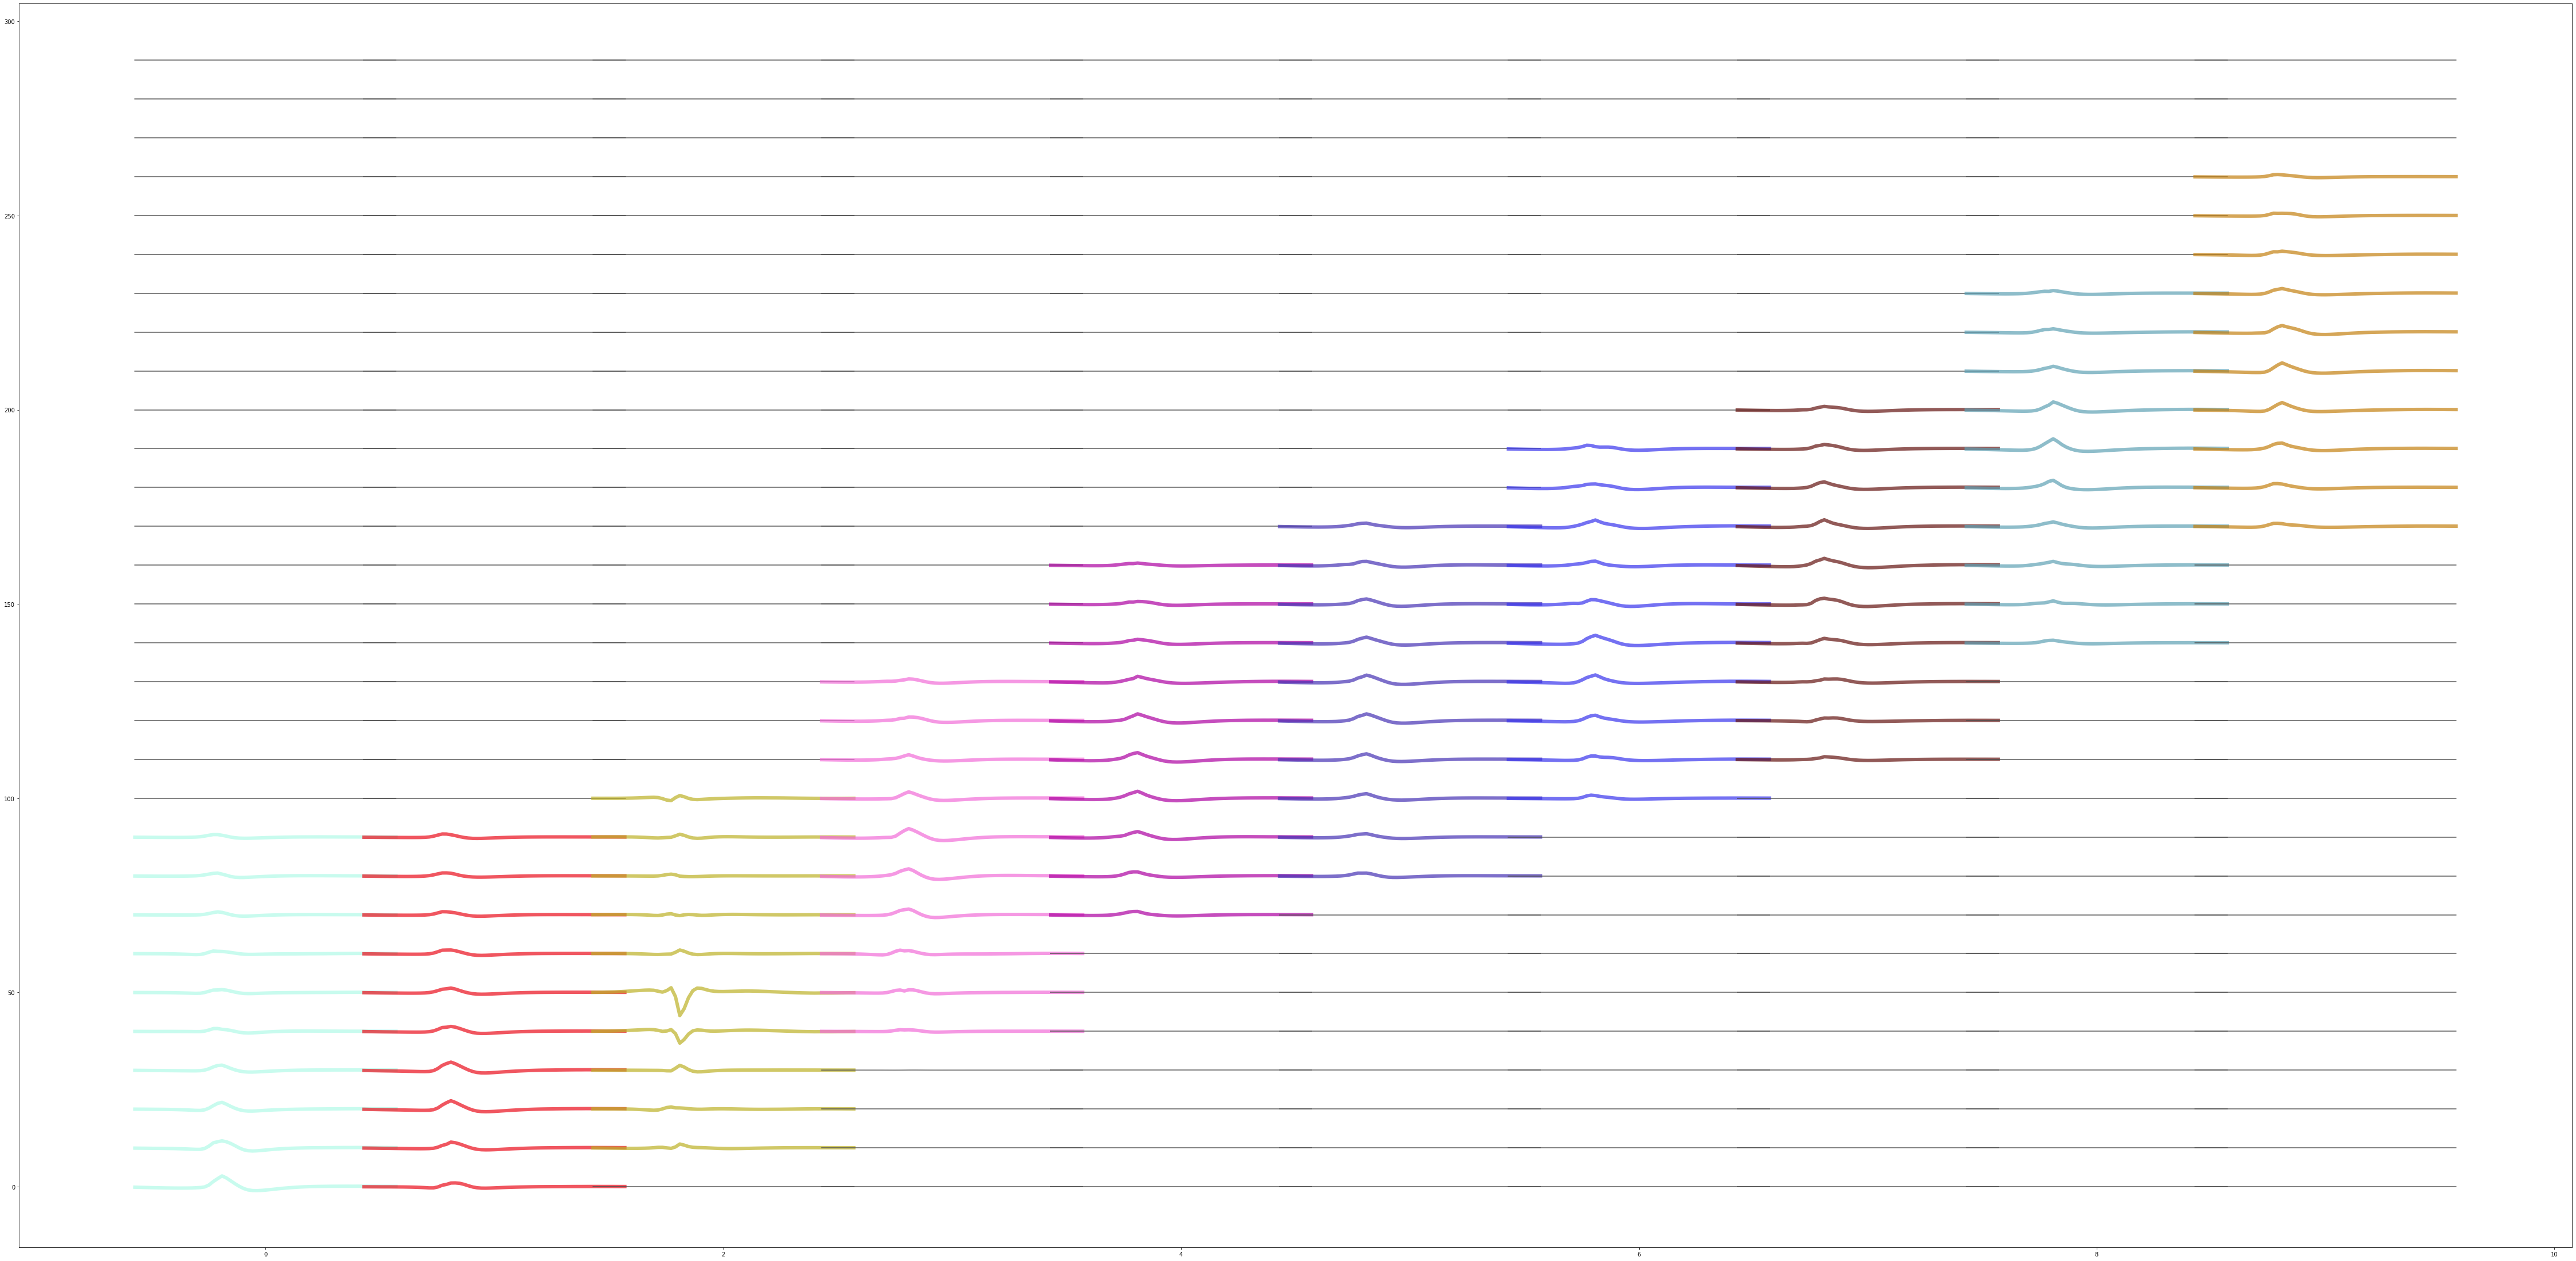

In [28]:
import numpy as np
import matplotlib.pyplot as plt

sorted_channel_indices = np.argsort(channel_y_positions)
ch_idx = sorted_channel_indices[np.arange(0,30)]
unit_idx = np.arange(0,10)
channel_y_positions = channel_positions[:, 1]
plt.figure(figsize=(80, 40))
x_id = 0
for unit_id in unit_idx:
    random_color = np.random.rand(3,)
#     if np.mean(templates[unit_id, :, ch_idx]) > 0:
    
    for ch_id in ch_idx:
        waveform = []
        waveform = templates[unit_id, :, ch_id]
        if np.abs(waveform).max() > 0.1:
            colorp = random_color
            width=6
        else:
            colorp = [0.3, 0.3, 0.3]
            width=2

#             print(unit_id, ch_id)
#             print(channel_y_positions[ch_id])
        waveform = waveform + channel_y_positions[ch_id] /2
        x_pos = np.linspace(-1.9, 1.9, 61)*0.3 + x_id 
        plt.plot(x_pos, waveform, color=colorp, linewidth=width, alpha=0.7)
    x_id += 1


# plt.xlabel("Unit Index")
# plt.ylabel("Amplitude")
# plt.title(f"Waveforms of All Units at Channel {ch_idx}")
plt.grid(False)
plt.savefig(r"\\172.30.3.33\homes\fetschlab\labMembers\Yueh-Chen\templates.png")
plt.show()

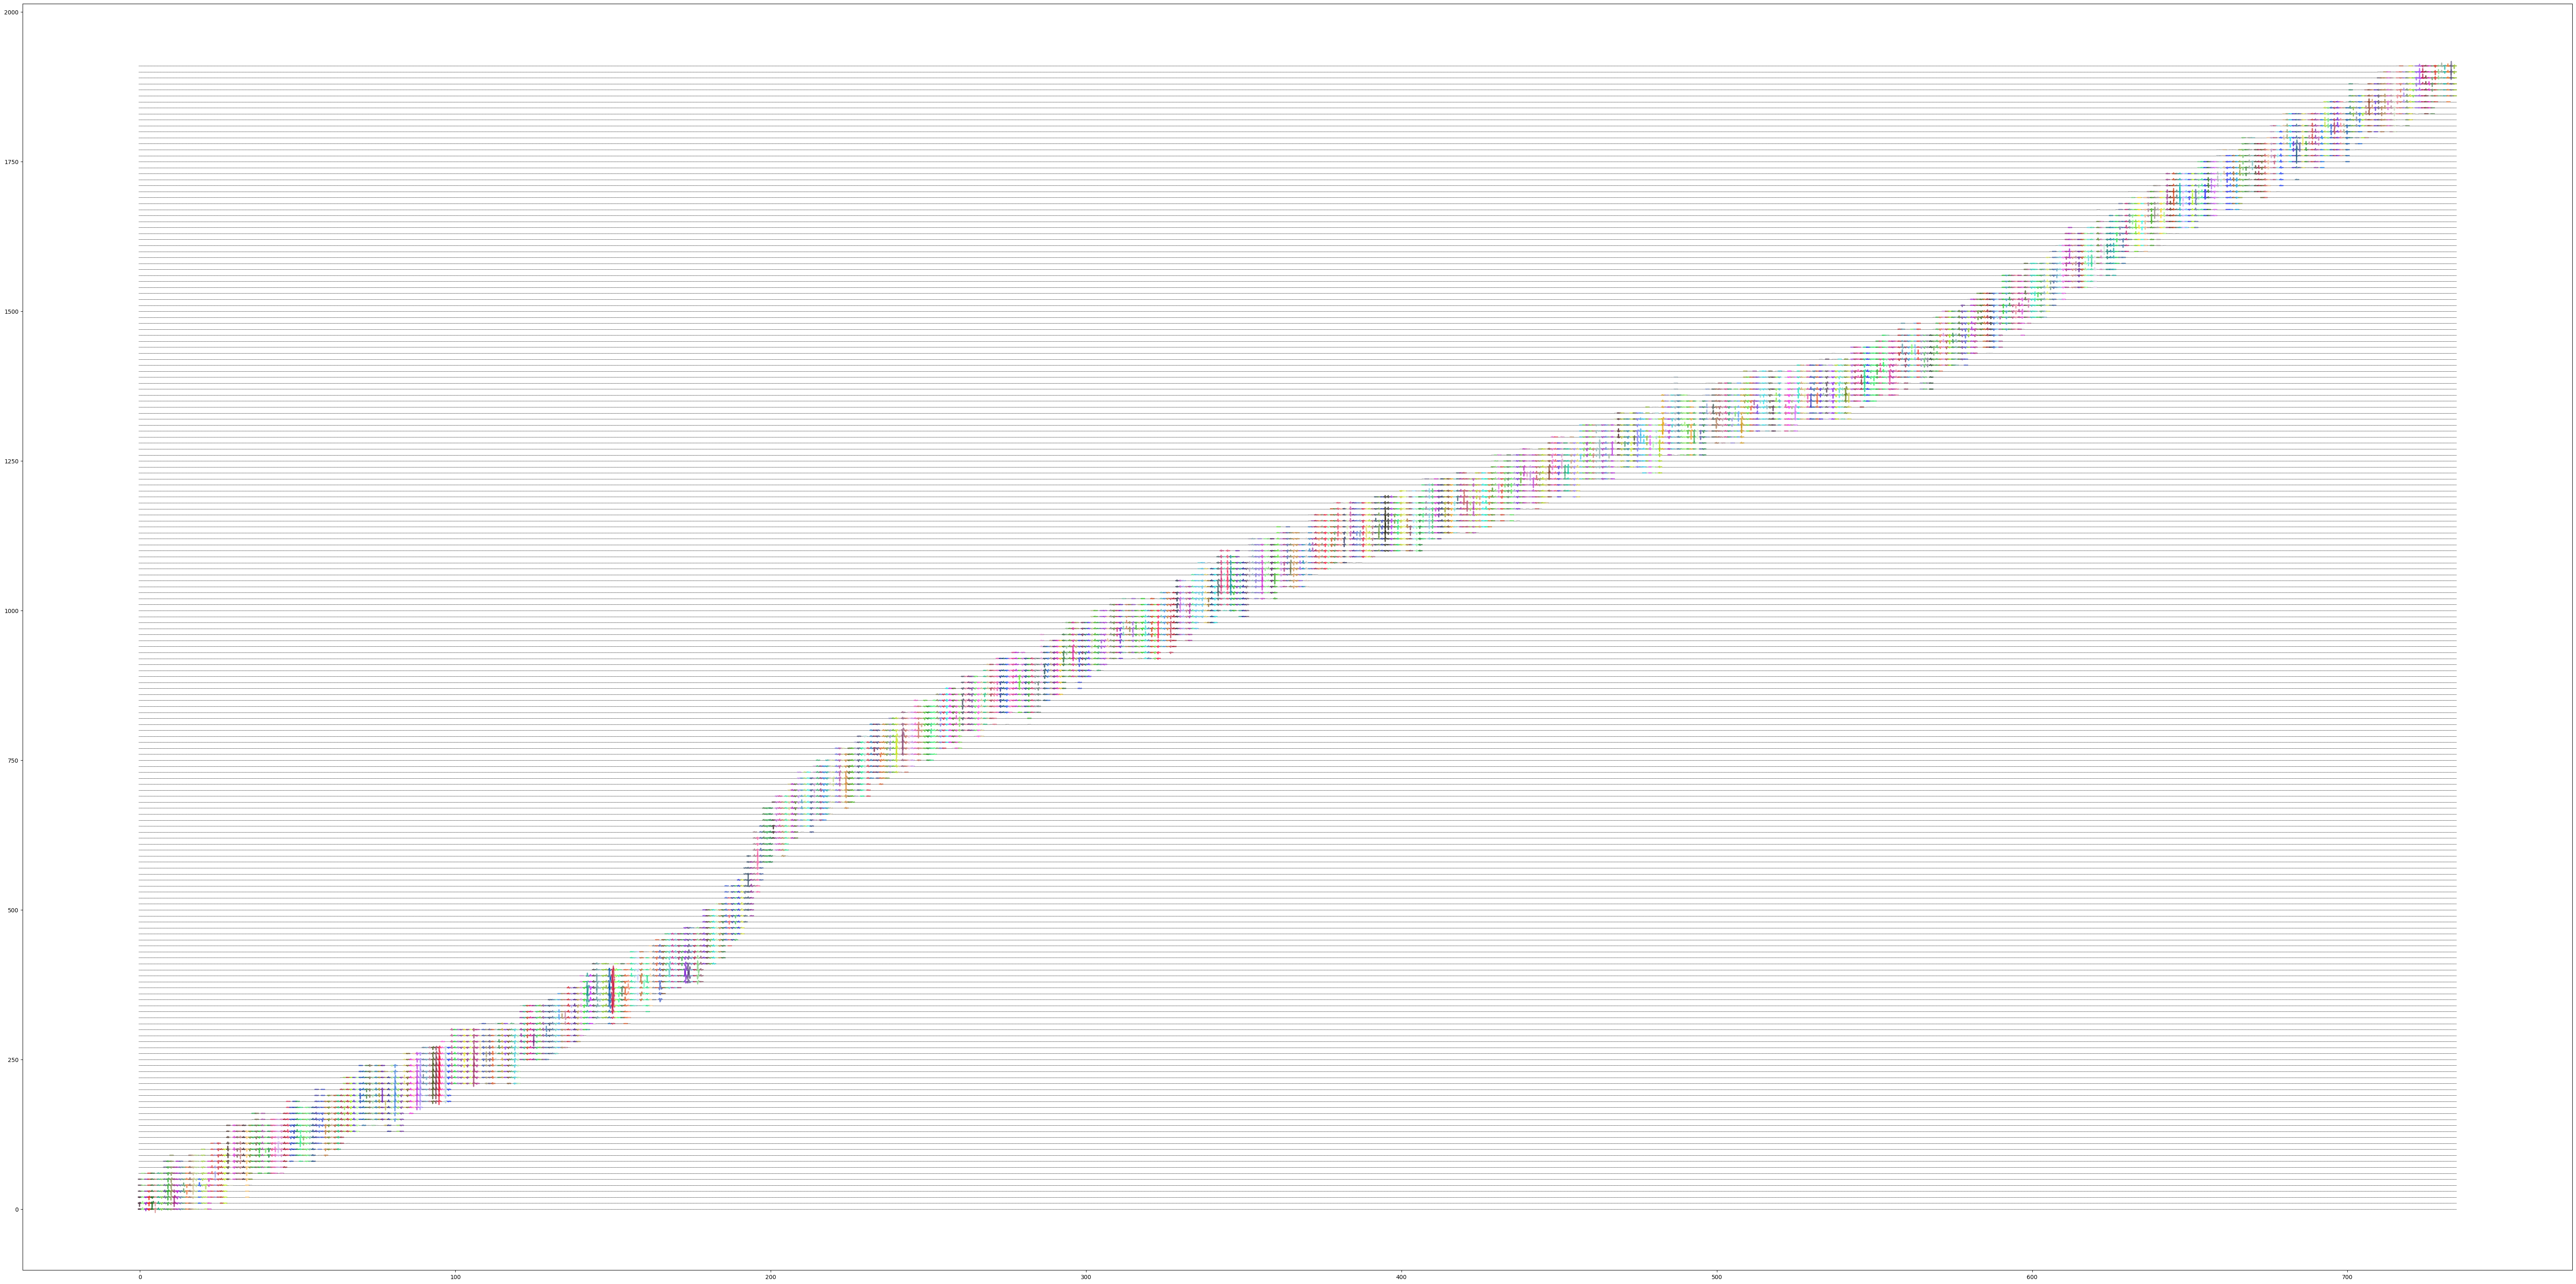

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#  `templates` is  (735, 61, 384) matrix
ch_idx = range(384)
unit_idx = range(735)
channel_y_positions = channel_positions[:, 1]
plt.figure(figsize=(80, 40))

for unit_id in unit_idx:
    random_color = np.random.rand(3,)
    
    for ch_id in ch_idx:
        waveform = []
        waveform = templates[unit_id, :, ch_id]
        if np.abs(waveform).max() > 0.1:
            colorp = random_color
            width=2
        else:
            colorp = [0.3, 0.3, 0.3]
            width=0.5
                
            
        waveform = waveform + channel_y_positions[ch_id] /2
        x_pos = np.linspace(-0.5, 0.5, 61) + unit_id  
        plt.plot(x_pos, waveform, color=colorp, linewidth=width, alpha=0.7)



# plt.xlabel("Unit Index")
# plt.ylabel("Amplitude")
# plt.title(f"Waveforms of All Units at Channel {ch_idx}")
plt.grid(False)
plt.savefig(r"\\172.30.3.33\homes\fetschlab\labMembers\Yueh-Chen\templates_all.png")
plt.show()